<a href="https://colab.research.google.com/github/JennyferSRodriguezH/Metodos--Numericos/blob/main/Epidemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problema**



Considere la tabla 1 que muestra los datos de una epidemia de influenza en un colegio ingles.


1.   Trazar una grafica con estos datos
2.   Usar los splines cubicos para trazar una curva suave sobre los mismos datos


       


```
#*t*      0   1   2  3   4   5   6   7   8   9   10  11  12  13   14
*I(t)*     1   3  6  25  73  222 294 258 237 191  125 69  27  11   4
```



Usando el metdo del **Spline cubico**, podemoso btener la grafica en la cual nos representa  la relacion de los dias y los contagios que se presentaron.

Polinomios por tramos: 
 x = [0,1]
-0.907921961194125*x**3 + 2.90792196119412*x + 1.0
 x = [1,2]
5.53960980597062*x**3 - 19.3425953014942*x**2 + 22.2505172626884*x - 5.44753176716475
 x = [2,3]
-6.25051726268837*x**3 + 51.3981671104597*x**2 - 119.23100756122*x + 88.8734847821072
 x = [3,4]
32.4624592447828*x**3 - 297.018621456781*x**2 + 926.019358140503*x - 956.376880919615
 x = [4,5]
-51.599319716443*x**3 + 711.722726077929*x**2 - 3108.94603199834*x + 4423.57697259884
 x = [5,6]
-4.06518037901074*x**3 - 1.28936398355498*x**2 + 456.114418309082*x - 1518.19044458019
 x = [6,7]
36.860041232486*x**3 - 737.943352990496*x**2 + 4876.03835235073*x - 10358.0383126635
 x = [7,8]
-20.3749845509333*x**3 + 463.992188461308*x**2 - 3537.5104378119*x + 9273.57553104932
 x = [8,9]
4.63989697124709*x**3 - 136.36496807102*x**2 + 1265.34681444673*x - 3534.04380830703
 x = [9,10]
6.81539666594491*x**3 - 195.103459827862*x**2 + 1793.9932402583*x - 5119.98308574174
 x = [10,11]
-1.90148363502675*x**3 + 66.4

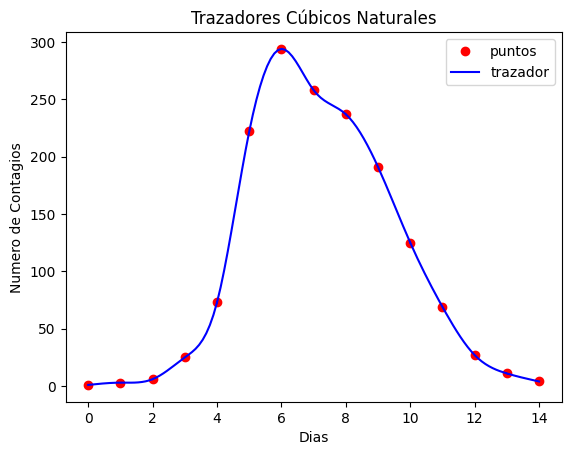

In [8]:
# Spline cúbico natural
import numpy as np
import sympy as sym
import math
import matplotlib.pyplot as plt


def SCNatural(xi,yi):
    n = len(xi)

    #Buscamos el valor de h
    h = np.zeros(n-1, dtype = float)#la iniciamos como un array de n-1 dimensiones
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]

#Iniciamos el sistema de ecuaciones que convertiremos en una matriz
    A = np.zeros(shape=(n-2,n-2), dtype = float)
    B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

#Debido a que se tiene que apicar las condiciones de continuidad de S, S' Y S'', dividiremos y multiplicaremos en la formula por el valor 6
    #Comenzamos a definir las posiciones de la matris con respecto a las formulas del metodo
    A[0,0] = 2*(h[0]+h[1])
    A[0,1] = h[1]
    B[0] = 6*((yi[2]-yi[1])/h[1] - (yi[1]-yi[0])/h[0])

    for i in range(1,n-3,1): #con un ciclo vamos ingresando nuevos valores en las posiciones indicadas
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2]-yi[i+1])/h[i+1]
        factor10 = (yi[i+1]-yi[i])/h[i]
        B[i] = 6*(factor21 - factor10)

    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-3] = 6*(factor12 - factor23)

    # Resolvemos el sistema de ecuaciones de S
    r = np.linalg.solve(A,B)
    #np.linalg.solve nos sirve para resolver una ecuacion matricial, en
    #este caso, se resolveria en A yB, de acuerdo a lo que obtuvimos
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0

    #Para obtener los coeficientes
    #rellenamos las listas con valores ceros de tipo float
    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    #Comenzamos a juntar lo anterior de acuerdo a la fromula
    for j in range(0,n-1,1): #usamos un rango menor al de la lista de x, iniciada en 0
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]

    # Traza
    #Imprimios todos los polinomios de cada parte
    x = sym.Symbol('x') #usamos a x como variable para poder trabajar con ella
    px_tabla = [] #esto nos ayudara a guardar el polinomio terminando el ciclo
    for j in range(0,n-1,1):
        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]

        pxtramo = pxtramo.expand()
        px_tabla.append(pxtramo)#agregamos el polinomio de tramo en la lista vacia

    return(px_tabla)

# Ingresamos los datos
xi = np.array([0,1 ,  2,  3,   4,   5,   6,   7,   8,   9,   10,  11,  12,  13,   14])
fi=np.array([1,   3,  6,  25 , 73 , 222, 294, 258, 237, 191,  125, 69,  27 , 11 ,  4])
muestras = 10 # entre cada par de puntos


# Creamos la tabla de polinomios por tramos
n = len(xi)
px_tabla = SCNatural(xi,fi)

print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))


# GRAFICA
# Puntos para graficar cada tramo
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)

    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)

    # vectores de trazador en x,y
    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1
print('\n\n')

# Gráfica
plt.plot(xi,fi,'ro', label='puntos')
plt.plot(xtraza,ytraza, label='trazador'
         , color='blue')
plt.title('Trazadores Cúbicos Naturales')
plt.xlabel('Dias')
plt.ylabel('Numero de Contagios')
plt.legend()
plt.show()